### google colab에서만 돌아갑니다 ..

In [38]:
# 설치 후, 세션 다시 시작 (그래프에 한글이 추력될 수 있도록 하는 것)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,053 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123605 files and dire

In [1]:
!pip install konlpy

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

import re
from collections import Counter

# from nltk.tokenize import word_tokenize
# from nltk import ngrams
# import nltk
from konlpy.tag import Okt # 형태소 추출

In [3]:
plt.rc('font', family='NanumBarunGothic')

### 파일 불러오기

1. 왼쪽 중앙 파일 이모지 선택 후, 드라이브 마운트 클릭
2. 불러올 파일 선택 후, 우클릭 후 경로 복사하기

In [4]:
# 경로 붙여넣기
file_path = "test_data_analysis.csv"
df = pd.read_csv(file_path, encoding="cp949")
df.head(5)

,board,title,date,time,content,view,comment
0,자유 수다방,갓비움 먹고도 해결안되는... 변비,2024.09.25.,15:29,어제 CU달려가서 갓비움 먹었는데 배에서 부글부글 소리만나고 아무런.. 변화가없어...,111,"잘익은바나나, 키위, 양배추, ph365유산균, 따뜻한 물 크게한잔!으로 평소관리하..."
1,자유 수다방,아기 유산균,2024.09.25.,15:25,어디꺼 먹이세요?ㅠㅠ,52,저는 락피도엘 ph365 번갈아가며 먹어용 ^^\n\n번갈아가며 먹여야한다고 하더라...
2,육아 정보/질문,아기 영양제,2024.09.24.,12:06,감기가 자주 걸리는데 24개월 아기 어떤 거 먹이세요??,67,파파초이스꺼 아연 비타민디 먹이고있어요\n\n엇 찾아볼게요!\n\n매일먹이는건 ph...
3,자유 수다방,변비잉가 봐주세요 ㅠㅠ,2024.09.24.,10:54,화장실을 가도 한 10%정도는 속에 남아있는 느낌이고 뭔가...시원하지않아요 그래...,18,변비까지는 아니지만? 장기능이 떨어지긴한거 아닐까요? 매일 아침 ph365먹고 따뜻...
4,자유 수다방,아이 면역력위해 자주 먹이는거 뭐있으신가요?,2024.09.21.,16:00,영양제나 식품이나 모두 궁금해요 ㅎㅎ 감기걸렸을때 항생제 먹으면 안된다는 글을 봐...,262,영양제로 챙겨요 잘 먹으려고 하지만 안되는 부분도 있기 때문에 ph365에서 유산균...


In [5]:
# 결과 출력
print("게시글 개수:", len(df))

게시글 개수: 45


### 각 빈도수 체크

게시글 빈도 수 체크

1. 게시판 종류
2. 시간별 (hour)
3. 월별
4. 일별

In [6]:
# 게시글 빈도
board_counts = df['board'].value_counts()

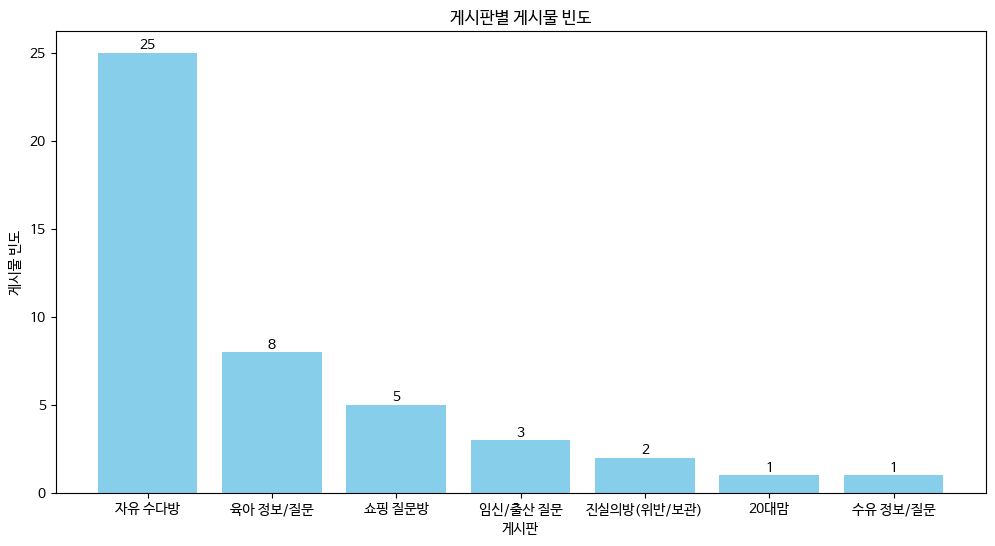

In [7]:
plt.figure(figsize=(12, 6))
bars = plt.bar(board_counts.index, board_counts.values, color='skyblue')

plt.title('게시판별 게시물 빈도')
plt.xlabel('게시판')
plt.ylabel('게시물 빈도')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval,
             int(yval),
             ha='center',
             va='bottom',
             fontsize=10)

plt.show()

In [8]:
# 시간(hour) 빈도
time_hours = df['time'].str.split(':').str[0].astype(int)
time_counts = time_hours.value_counts()

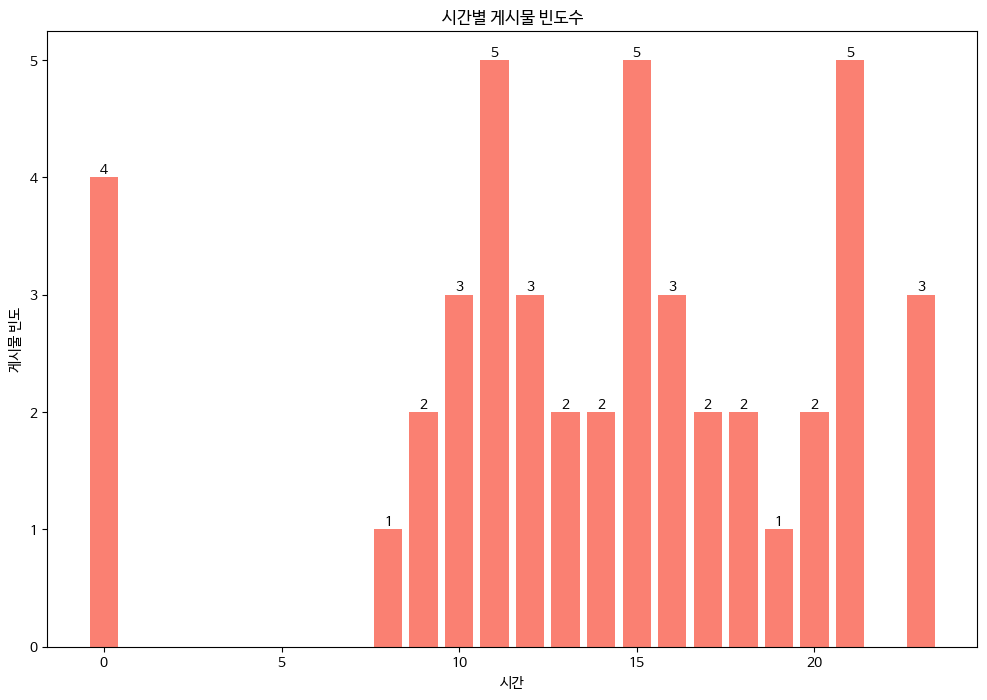

In [9]:
plt.figure(figsize=(12, 8))
sorted_time_counts = time_counts.sort_index()
plt.bar(sorted_time_counts.index, sorted_time_counts.values, color='salmon')

plt.title('시간별 게시물 빈도수')
plt.xlabel('시간')
plt.ylabel('게시물 빈도')

for i, bar in enumerate(plt.bar(sorted_time_counts.index, sorted_time_counts.values, color='salmon')):
    yval = sorted_time_counts.values[i]
    plt.text(bar.get_x() + bar.get_width()/2,
             yval,
             int(yval),
             ha='center',
             va='bottom',
             fontsize=10)

plt.show()

In [10]:
# 날짜 빈도 (월/일)
month_counts = df['date'].str.split('.').str[1].value_counts()
month_day_counts = df['date'].str[-6:-1].value_counts()

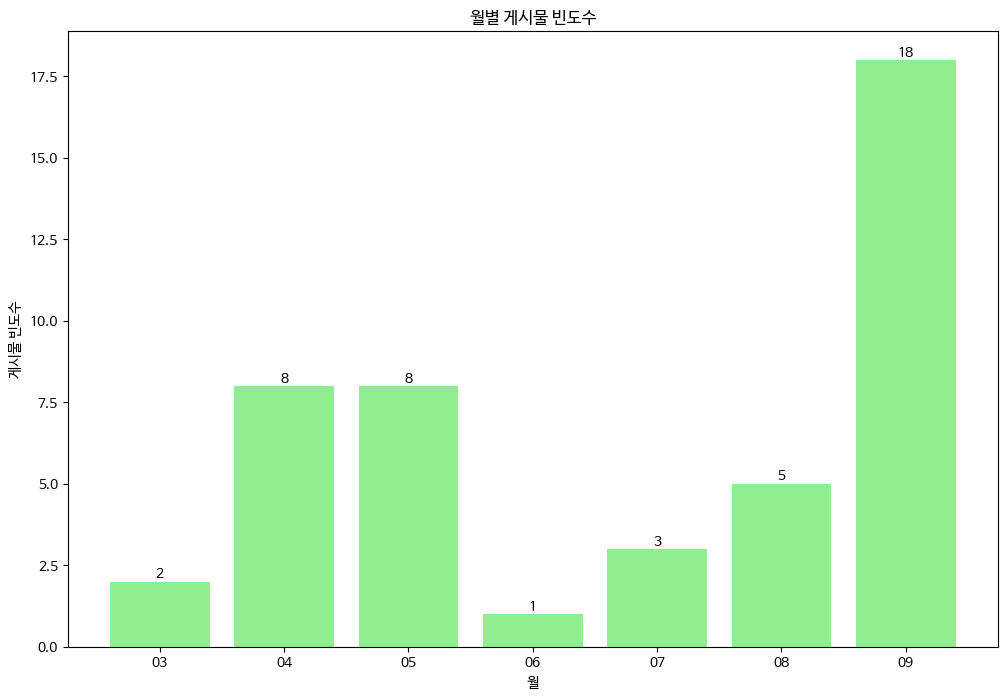

In [11]:
# 월별 빈도수 그래프
plt.figure(figsize=(12, 8))
sorted_month_counts = month_counts.sort_index()
plt.bar(sorted_month_counts.index, sorted_month_counts.values, color='lightgreen')

plt.title('월별 게시물 빈도수')
plt.xlabel('월')
plt.ylabel('게시물 빈도수')

for i, bar in enumerate(plt.bar(sorted_month_counts.index, sorted_month_counts.values, color='lightgreen')):
    yval = sorted_month_counts.values[i]
    plt.text(bar.get_x() + bar.get_width()/2,
             yval,
             int(yval),
             ha='center',
             va='bottom',
             fontsize=10)

plt.show()

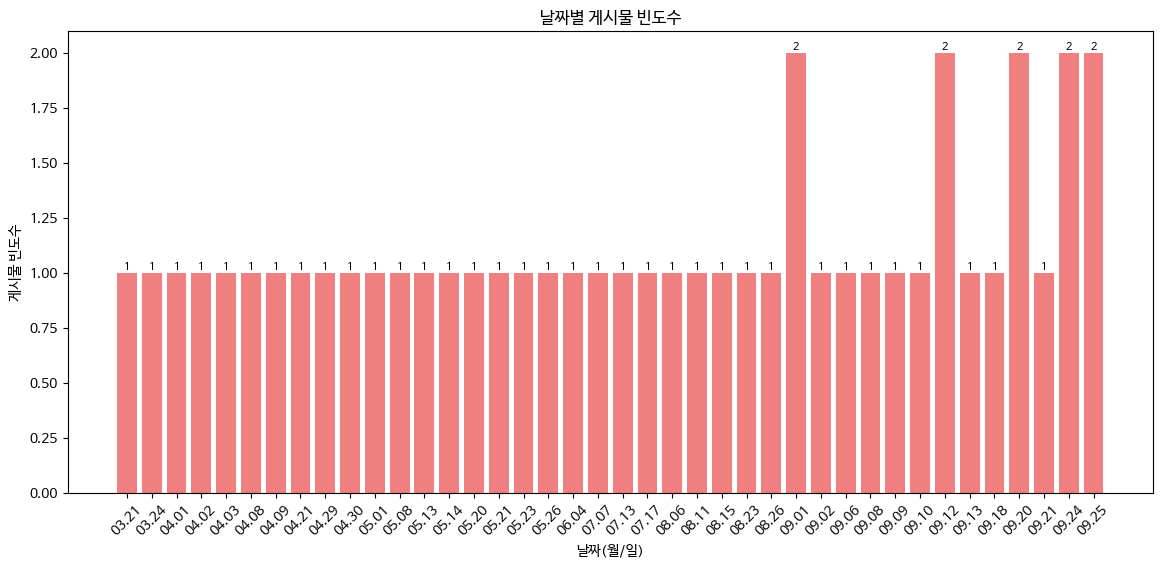

In [12]:
# 월/일 빈도수 그래프
plt.figure(figsize=(14, 6)) # 크기 조정 가능 (가로, 세로)
sorted_month_day_counts = month_day_counts.sort_index()
plt.bar(sorted_month_day_counts.index, sorted_month_day_counts.values, color='lightcoral')

plt.title('날짜별 게시물 빈도수')
plt.xlabel('날짜(월/일)')
plt.ylabel('게시물 빈도수')

plt.xticks(rotation=45) # x축(글씨) 기울기 45도 회전

# 막대 위에 빈도수 표시
for i, bar in enumerate(plt.bar(sorted_month_day_counts.index, sorted_month_day_counts.values, color='lightcoral')):
    yval = sorted_month_day_counts.values[i]
    plt.text(bar.get_x() + bar.get_width()/2,
             yval,
             int(yval),
             ha='center',
             va='bottom',
             fontsize=8)

plt.show()

게시판별 조회수 체크

1. 게시판 종류
2. 게시물 업로드 시간별 (hour)

→ 평균 추출

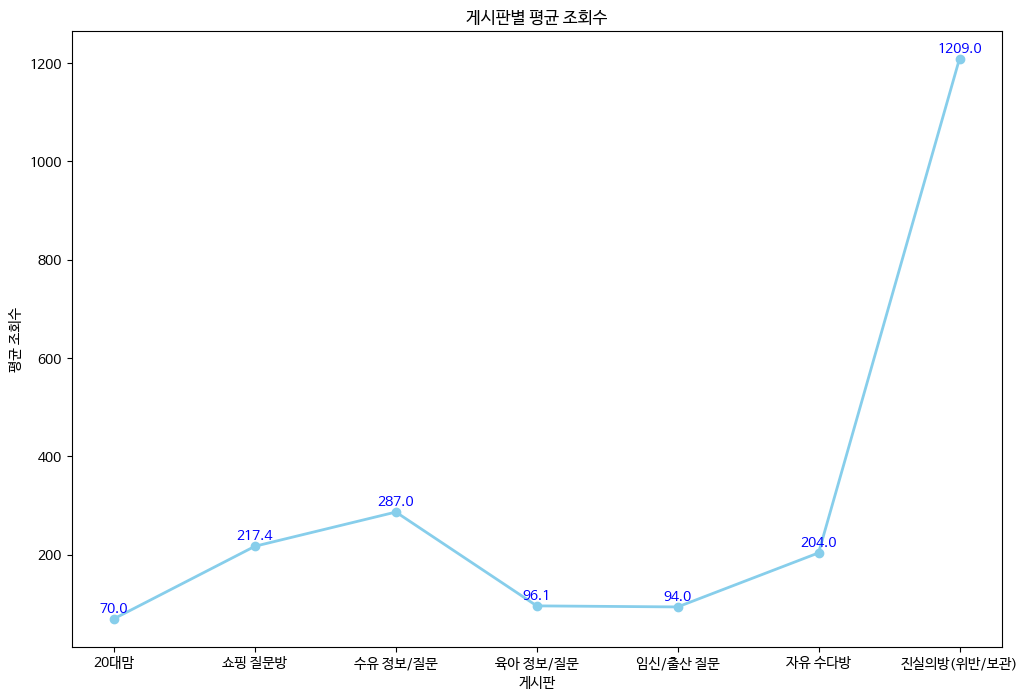

In [13]:
board_average_counts = df.groupby('board')['view'].mean()

plt.figure(figsize=(12, 8))
plt.plot(board_average_counts.index, board_average_counts.values, marker='o', color='skyblue', linestyle='-', linewidth=2)

plt.title('게시판별 평균 조회수')
plt.xlabel('게시판')
plt.ylabel('평균 조회수')

for i, value in enumerate(board_average_counts.values):
    plt.text(i, value + 5,
             f'{value:.1f}',
             ha='center',
             va='bottom',
             fontsize=10,
             color='blue')

plt.show()

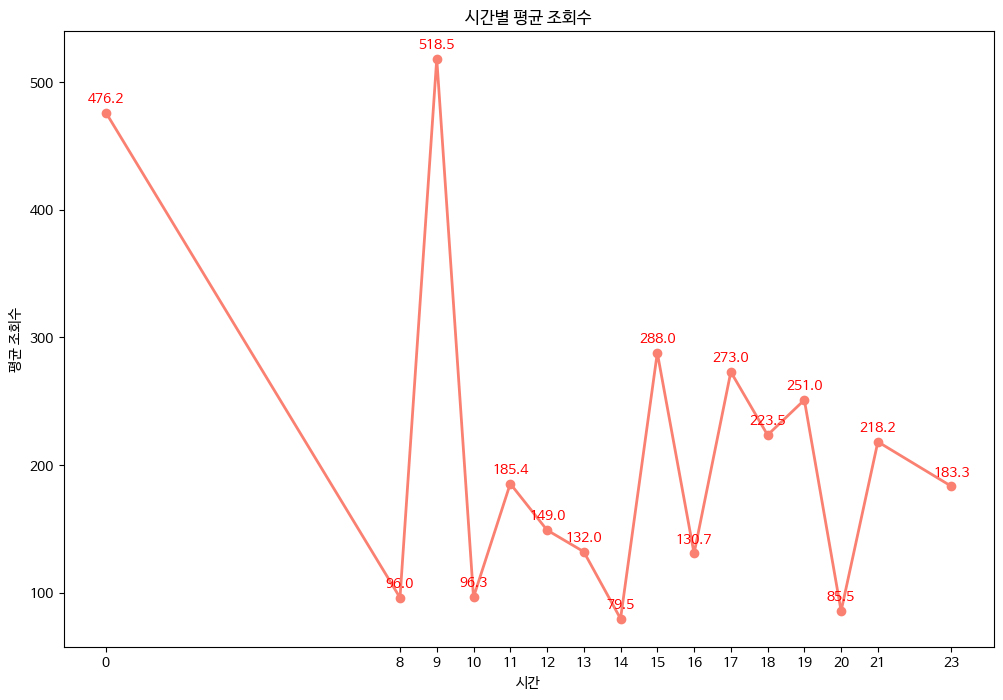

In [14]:
time_average_counts = df.groupby(df['time'].str.split(':').str[0].astype(int))['view'].mean()

plt.figure(figsize=(12, 8))
plt.plot(time_average_counts.index.astype(int), time_average_counts.values, marker='o', color='salmon', linestyle='-', linewidth=2)

plt.title('시간별 평균 조회수')
plt.xlabel('시간')
plt.ylabel('평균 조회수')

plt.xticks(time_average_counts.index.astype(int), rotation=0)  # x축 정보 표시

for i, value in enumerate(time_average_counts.values):
    plt.text(time_average_counts.index[i], value + 5,
             f'{value:.1f}',
             ha='center',
             va='bottom',
             fontsize=10,
             color='red')

plt.show()

### 데이터 전처리

1. 제목
2. 본문
3. 댓글
4. 제목 + 본문 + 댓글

In [15]:
# 정규화
def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'  # E-mail 제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'  # URL 제거
    text = re.sub(pattern, '', text)
    pattern = '[a-zA-Z0-9]'    # 숫자와 알파벳 제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호 제거
    text = re.sub(pattern, '', text)
    pattern = '\s+'             # 여러 개의 공백을 하나로
    text = re.sub(pattern, ' ', text)
    text = text.replace('\n', '').replace('\r', '')  # 줄바꿈 문자 제거
    return text.strip()  # 양쪽 공백 제거

In [16]:
title_pp = df['title'].apply(text_clean)
content_pp = df['content'].apply(text_clean)
comment_pp = df['comment'].apply(text_clean)

### 토큰화

In [17]:
titles_list = title_pp.tolist()
titles = ' '.join(titles_list)
print(titles[:100])

갓비움 먹고도 해결안되는 변비 아기 유산균 아기 영양제 변비잉가 봐주세요 아이 면역력위해 자주 먹이는거 뭐있으신가요 혈압은 낮추면서 모유수유 가능한 음식영양제 있을까요 임신주차중영


In [18]:
content_list = content_pp.tolist()
contents = ' '.join(content_list)
print(contents[:100])

어제 달려가서 갓비움 먹었는데 배에서 부글부글 소리만나고 아무런 변화가없어요 강력한 변비죠 해결되더라도 담날 또 변비 시작이구 어떻게 해결해야할까요 샐러드도먹고 물도 씩 먹는데 왜


In [19]:
comments_list = comment_pp.tolist()
comments = ' '.join(comments_list)
print(comments[:100])

잘익은바나나 키위 양배추 유산균 따뜻한 물 크게한잔으로 평소관리하고 그리고 정 안되면 마그밀먹었어요 감사해요 전 샤브샤브 집 가서 야채 무지하게 먹고 오면 몇일간 고생했던 변비에서


In [55]:
combined_text = ' '.join(title_pp.tolist() + content_pp.tolist() + comment_pp.tolist())
print(combined_text[:100])

갓비움 먹고도 해결안되는 변비 아기 유산균 아기 영양제 변비잉가 봐주세요 아이 면역력위해 자주 먹이는거 뭐있으신가요 혈압은 낮추면서 모유수유 가능한 음식영양제 있을까요 임신주차중영


### 품사 태깅

제목, 내용, 댓글 따로 정보 추출 가능

In [56]:
tokenizer = Okt()
# raw_pos_tagged = tokenizer.pos(titles, norm=True, stem=True)
# raw_pos_tagged = tokenizer.pos(contents, norm=True, stem=True)
# raw_pos_tagged = tokenizer.pos(comments, norm=True, stem=True)
raw_pos_tagged = tokenizer.pos(combined_text, norm=True, stem=True)
print(raw_pos_tagged)

[('갓', 'Noun'), ('비우다', 'Verb'), ('먹고다', 'Verb'), ('해결', 'Noun'), ('안되다', 'Adjective'), ('변비', 'Noun'), ('아기', 'Noun'), ('유산균', 'Noun'), ('아기', 'Noun'), ('영', 'Modifier'), ('양제', 'Noun'), ('변비잉', 'Noun'), ('가', 'Josa'), ('보다', 'Verb'), ('아이', 'Noun'), ('면역', 'Noun'), ('력', 'Suffix'), ('위해', 'Noun'), ('자주', 'Noun'), ('먹이다', 'Verb'), ('뭐', 'Noun'), ('있다', 'Adjective'), ('가요', 'Noun'), ('혈압', 'Noun'), ('은', 'Josa'), ('낮추다', 'Verb'), ('모유수유', 'Noun'), ('가능하다', 'Adjective'), ('음식', 'Noun'), ('영', 'Modifier'), ('양제', 'Noun'), ('있다', 'Adjective'), ('임신', 'Noun'), ('주차', 'Noun'), ('중', 'Suffix'), ('영', 'Modifier'), ('양', 'Modifier'), ('제', 'Modifier'), ('추천', 'Noun'), ('해주다', 'Verb'), ('돌', 'Noun'), ('영', 'Modifier'), ('양제', 'Noun'), ('영', 'Modifier'), ('양제', 'Noun'), ('시작', 'Noun'), ('해보다', 'Verb'), ('어떻다', 'Adjective'), ('챙기다', 'Verb'), ('먹다', 'Verb'), ('야하다', 'Adjective'), ('요', 'Noun'), ('효소', 'Noun'), ('진짜', 'Noun'), ('좋다', 'Adjective'), ('먹다', 'Verb'), ('보신', 'Noun'), ('분', 'Suffix'), ('

In [57]:
# 불용어 설정 (이는 txt 파일로 시중에 많음)
stopwords = ['를', '이', '은', '는', '있다', '하다', '에', "이다", "이후", "없다", "대해", "되다"]

In [58]:
# ## 조사, 어미, 구두점, 외국어를 제외한 모든 품사
# word_clean = []
# for word in raw_pos_tagged:
#   # 조사, 어미, 구두점, 외국어인 경우 제거
#     if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]:
#         # 단어의 길이가 1이 아니며, stopwords에 해당되지 않는 단어들
#         if (len(word[0]) != 1) & (word[0] not in stopwords):
#             word_clean.append(word[0])

# print("정제된 단어 개수: ", len(word_clean))
# print("단어 예시: ", word_clean[:5])

In [59]:
## 명사 품사만 추출
word_clean = []
for word in raw_pos_tagged:
    # 명사인 경우만 추가
    if word[1] == "Noun":
        # 단어의 길이가 1이 아니며, stopwords에 해당되지 않는 단어들
        if (len(word[0]) != 1) & (word[0] not in stopwords):
            word_clean.append(word[0])

print("정제된 명사 개수: ", len(word_clean))
print("명사 예시: ", word_clean[:5])

정제된 명사 개수:  2641
명사 예시:  ['해결', '변비', '아기', '유산균', '아기']


In [60]:
# ## 명사, 형용사 품사만 추출
# word_clean_nouns_adjectives = []
# for word in raw_pos_tagged:
#     # 명사 또는 형용사인 경우 추가 (이 외에도 코드에 "Verb" 같은 품사들 추가 가능)
#     if word[1] in ["Noun", "Adjective"]:
#         # 단어의 길이가 1이 아니며, stopwords에 해당되지 않는 단어들
#         if (len(word[0]) != 1) & (word[0] not in stopwords):
#             word_clean_nouns_adjectives.append(word[0])

# print("정제된 명사와 형용사 개수: ", len(word_clean_nouns_adjectives))
# print("명사와 형용사 예시: ", word_clean_nouns_adjectives[:5])

#### 단어 빈도 카운트

In [61]:
result = Counter(word_clean)
word_dic = dict(result)
print(word_dic)

{'해결': 4, '변비': 61, '아기': 21, '유산균': 166, '양제': 53, '변비잉': 1, '아이': 44, '면역': 13, '위해': 5, '자주': 10, '가요': 5, '혈압': 6, '모유수유': 5, '음식': 6, '임신': 17, '주차': 2, '추천': 38, '시작': 7, '효소': 16, '진짜': 12, '보신': 2, '준비': 2, '남편': 9, '임산부': 7, '분유': 36, '초기': 4, '요즘': 12, '철분': 24, '키즈': 14, '번가': 2, '핫딜': 3, '점점': 1, '후반': 5, '나이': 5, '부탁': 1, '베이비': 17, '횐님들': 1, '공유': 4, '조리': 14, '가스': 8, '신분': 3, '신생아': 6, '차고': 3, '개월': 10, '태기': 2, '빈뇨': 5, '문제': 4, '고민': 6, '생리통': 9, '언제': 3, '비타민': 98, '아연': 19, '어디': 5, '아가': 3, '발락': 8, '어제': 2, '소리': 2, '변화': 1, '담날': 2, '이구': 1, '샐러드': 1, '감기': 4, '화장실': 5, '가도': 2, '정도': 8, '느낌': 5, '뭔가': 1, '나중': 3, '볼일': 1, '보고': 4, '관리': 4, '영양': 5, '제나': 1, '식품': 2, '모두': 3, '항생제': 1, '위주': 3, '약도': 2, '출산': 9, '한지': 2, '일주일': 2, '중독증': 1, '조산': 1, '주일': 1, '살이': 1, '좀처럼': 1, '두통': 2, '때문': 11, '보기': 1, '수요일': 1, '내과': 2, '허브': 4, '구매': 9, '엽산': 15, '종영': 1, '가격': 11, '지금': 11, '닥터': 10, '에디': 5, '하나': 11, '이제': 7, '필수': 11, '모네': 13, '꼭꼭': 1, '제품': 19, '소화': 8

In [62]:
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
print(sorted_word_dic)

[('유산균', 166), ('비타민', 98), ('변비', 61), ('양제', 53), ('아이', 44), ('추천', 38), ('분유', 36), ('먹이', 36), ('효과', 33), ('철분', 24), ('오메가', 22), ('아기', 21), ('아연', 19), ('제품', 19), ('종합', 18), ('임신', 17), ('베이비', 17), ('효소', 16), ('엽산', 15), ('처방', 15), ('키즈', 14), ('조리', 14), ('계속', 14), ('병원', 14), ('면역', 13), ('모네', 13), ('칼슘', 13), ('한번', 13), ('진짜', 12), ('요즘', 12), ('그냥', 12), ('아침', 12), ('가루', 12), ('때문', 11), ('가격', 11), ('지금', 11), ('하나', 11), ('필수', 11), ('마그네슘', 11), ('보장', 11), ('자주', 10), ('개월', 10), ('닥터', 10), ('먹기', 10), ('매일', 10), ('산양', 10), ('남편', 9), ('생리통', 9), ('출산', 9), ('구매', 9), ('혹시', 9), ('생리', 9), ('생각', 9), ('저녁', 9), ('저희', 9), ('빈혈', 9), ('가스', 8), ('발락', 8), ('정도', 8), ('소화', 8), ('오타', 8), ('멀티', 8), ('밀크', 8), ('제일', 8), ('트리', 8), ('시작', 7), ('임산부', 7), ('이제', 7), ('쿠팡', 7), ('하루', 7), ('이노시톨', 7), ('임비', 7), ('혈압', 6), ('음식', 6), ('신생아', 6), ('고민', 6), ('콜라겐', 6), ('건강', 6), ('가지', 6), ('이번', 6), ('비오비', 6), ('락토핏', 6), ('듀오', 6), ('추가', 6), ('티아이', 6), ('

In [74]:
# # csv 저장 가능
# df_sorted = pd.DataFrame(sorted_word_dic, columns=['Word', 'Frequency'])
# df_sorted.to_csv('sorted_word_frequencies.csv', index=False, encoding='utf-8-sig')
# print("CSV 파일로 저장되었습니다.")
# df_sorted.head(5)

CSV 파일로 저장되었습니다.


,Word,Frequency
0,유산균,166
1,비타민,98
2,변비,61
3,양제,53
4,아이,44


### 빈도수 시각화

line plot

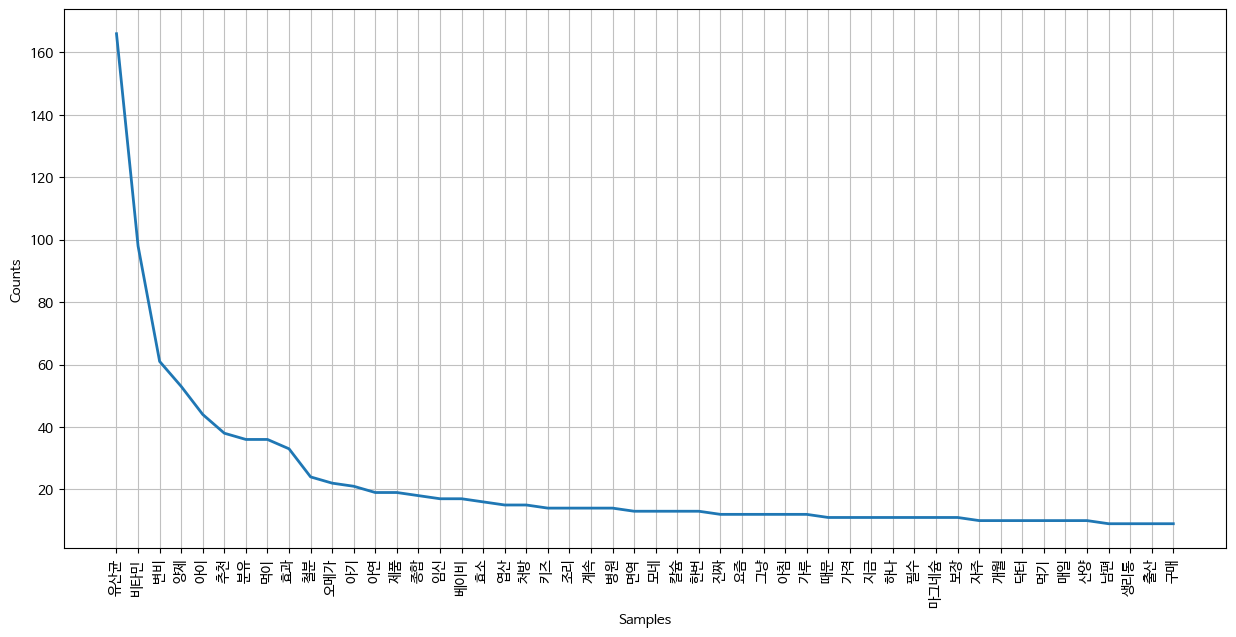

<Axes: xlabel='Samples', ylabel='Counts'>

In [63]:
word_counted = nltk.Text(word_clean)
plt.figure(figsize=(15,7))
word_counted.plot(50)

bar plot

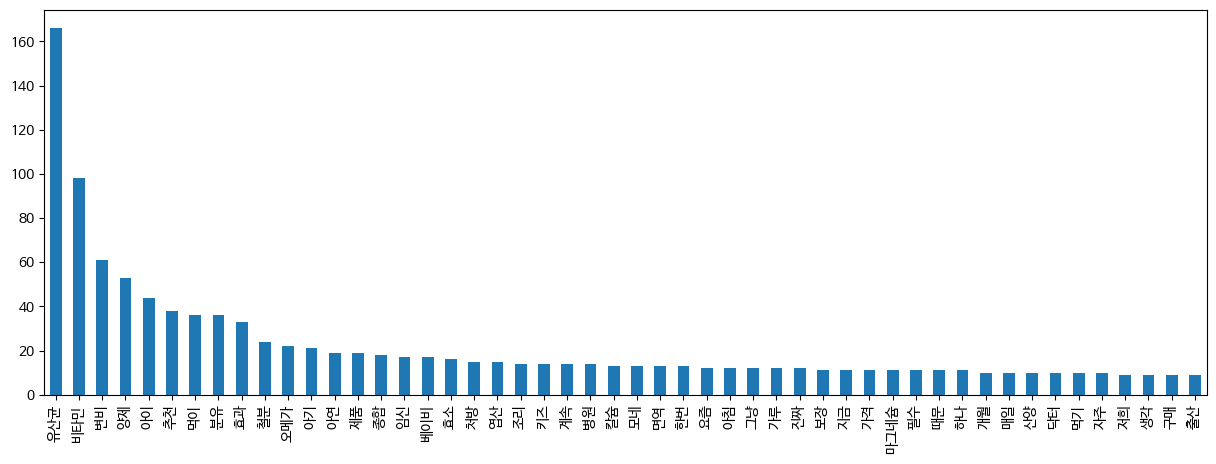

In [64]:
word_frequency = nltk.FreqDist(word_clean)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

#### 단어 빈도수에 맞게 표로 정리

In [68]:
# count 뒤 숫자는 원하는대로 설정
filtered_word_dic = [(word, count) for word, count in sorted_word_dic if count >= 5]

# dataframe 생성
# columns명은 원하는대로 설정
df_filtered = pd.DataFrame(filtered_word_dic, columns=['Word', 'Frequency'])
df_filtered.head(5)

,Word,Frequency
0,유산균,166
1,비타민,98
2,변비,61
3,양제,53
4,아이,44


In [73]:
## csv 파일 저장
df_filtered.to_csv('filtered_word_frequencies.csv', index=False, encoding='utf-8-sig')
print("CSV 파일로 저장되었습니다.")

CSV 파일로 저장되었습니다.
